In [1]:
import xarray as xr
import geopandas as gpd
from shapely.geometry import Point
import pandas as pd
import matplotlib.pyplot as plt

ds = xr.open_dataset('./era5_2018.nc')
ds

<xarray.Dataset>
Dimensions:    (longitude: 13, latitude: 7, time: 2208)
Coordinates:
  * longitude  (longitude) float32 -125.0 -124.8 -124.5 ... -122.5 -122.2 -122.0
  * latitude   (latitude) float32 48.5 48.25 48.0 47.75 47.5 47.25 47.0
  * time       (time) datetime64[ns] 2018-10-01 ... 2018-12-31T23:00:00
Data variables:
    u10        (time, latitude, longitude) float32 ...
    v10        (time, latitude, longitude) float32 ...
    d2m        (time, latitude, longitude) float32 ...
    t2m        (time, latitude, longitude) float32 ...
    sp         (time, latitude, longitude) float32 ...
    tp         (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2024-02-03 04:31:06 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [2]:
# Extract latitude, longitude, and temperature variables from the xarray dataset
latitudes = ds['latitude'].values
longitudes = ds['longitude'].values
temperatures = ds['t2m'].values
times = ds['time'].values

In [3]:
temperatures.shape

(2208, 7, 13)

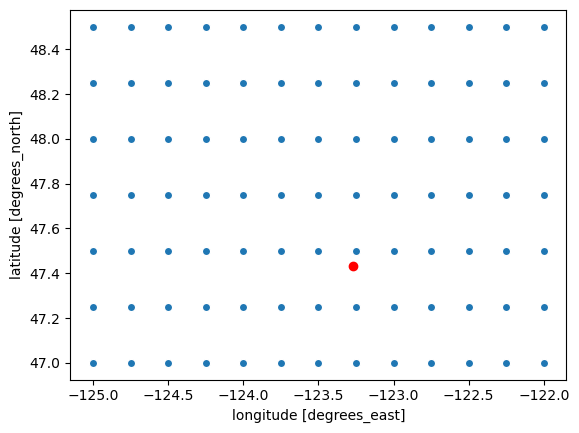

In [4]:
plt.figure()
ds.plot.scatter(x='longitude', y='latitude')
plt.plot(-123.27, 47.43, 'ro')

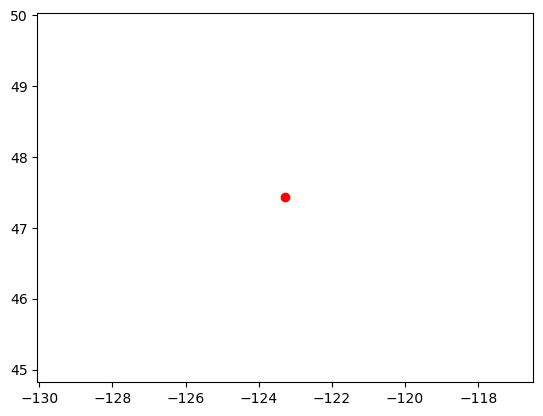

In [5]:
plt.figure()
plt.plot(-123.27, 47.43, 'ro')

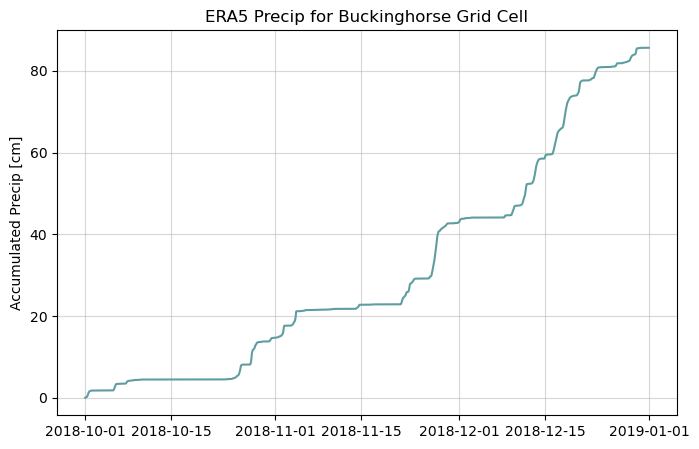

In [6]:
# Specify the latitude and longitude values you're interested in
target_lat = 47.43
target_lon = -123.27

# Select data for the specified latitude and longitude using the sel method
buck = ds.sel(latitude=target_lat, longitude=target_lon, method='nearest')

# Print the selected data
plt.figure(figsize=(8,5))
buck = buck.to_dataframe()
plt.plot(buck.tp.cumsum()*100, color='cadetblue')
plt.title('ERA5 Precip for Buckinghorse Grid Cell')
plt.ylabel('Accumulated Precip [cm]')
plt.grid(alpha=0.5)

In [7]:
# Specify the time value you're interested in
target_time = '2018-12-01T00:00:00'  # Replace with your actual timestamp

# Convert the target_time to a pandas Timestamp if it's not already
target_time = pd.to_datetime(target_time)

# Select data for the specified time using the sel method
a = ds.sel(time=target_time)

# Print the selected data
print(a)

<xarray.Dataset>
Dimensions:    (longitude: 13, latitude: 7)
Coordinates:
  * longitude  (longitude) float32 -125.0 -124.8 -124.5 ... -122.5 -122.2 -122.0
  * latitude   (latitude) float32 48.5 48.25 48.0 47.75 47.5 47.25 47.0
    time       datetime64[ns] 2018-12-01
Data variables:
    u10        (latitude, longitude) float32 ...
    v10        (latitude, longitude) float32 ...
    d2m        (latitude, longitude) float32 ...
    t2m        (latitude, longitude) float32 282.0 281.5 280.3 ... 279.4 277.6
    sp         (latitude, longitude) float32 ...
    tp         (latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2024-02-03 04:31:06 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...


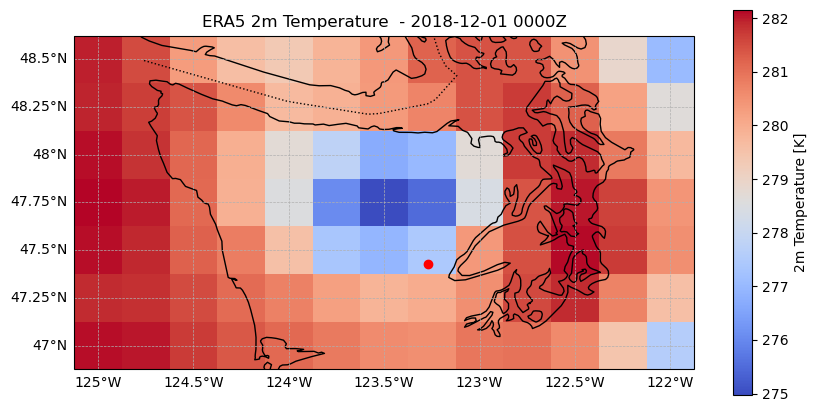

In [10]:
import geopandas as gpd
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LongitudeFormatter, LatitudeFormatter


# Specify the variable you want to plot
variable_to_plot = 't2m'  # Replace with your actual variable name

# Create a GeoAxes instance with PlateCarree projection
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(10,5))

# Plot the data
pcm = ax.pcolormesh(a['longitude'], a['latitude'], a[variable_to_plot], cmap='coolwarm')
plt.colorbar(pcm, label='2m Temperature [K]')  # Add a colorbar with the variable name

# Add state outlines
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.STATES, edgecolor='black')

# Set labels and title
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('ERA5 2m Temperature  - 2018-12-01 0000Z')

# Add latitude and longitude axis labels
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linestyle='--', linewidth=0.5)
gl.top_labels = False  # Turn off top labels
gl.right_labels = False  # Turn off right labels
gl.xformatter = LongitudeFormatter()
gl.yformatter = LatitudeFormatter()

ax.plot(-123.27, 47.43, 'ro')

# Show the plot
plt.show()


In [9]:
def era5_tsel(ds, time):
    # Specify the time value you're interested in
    target_time = '2018-12-01T00:00:00'  # Replace with your actual timestamp

    # Convert the target_time to a pandas Timestamp if it's not already
    target_time = pd.to_datetime(target_time)

    # Select data for the specified time using the sel method
    a = ds.sel(time=target_time)

    return(a)